In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np

### Read data

In [32]:
df=pd.read_csv("C:/Users/hp/OneDrive/Desktop/Mall_Customers (1).csv")


In [33]:
x = df.iloc[:,3:]

### calculate k value , no. of cluster 

In [34]:
#elbow method
from sklearn.cluster import KMeans

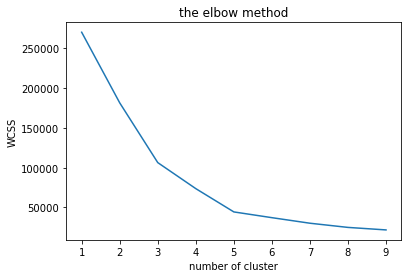

In [35]:
wcss= []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   # inertia is a distance
plt.plot(range(1,10),wcss)
plt.title("the elbow method")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [40]:
df['clusters']=y_kmeans
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [41]:
len(df[df['clusters']==0])

81

In [42]:
len(df[df['clusters']==1])  

35

In [43]:
len(df[df['clusters']==2])

23

In [44]:
len(df[df['clusters']==3])

22

In [45]:
len(df[df['clusters']==4])


39

In [46]:
81+35+23+22+39

0

In [48]:
# looking at the point which belong to clusters
x[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


###  Visualising the cluster

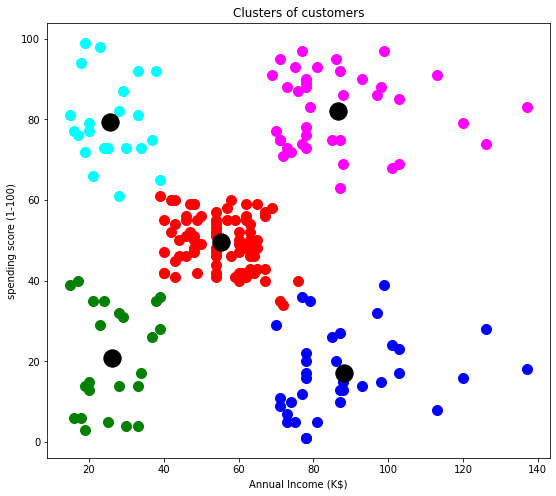

In [55]:
plt.figure(figsize=(9,8))
plt.scatter(x[y_kmeans == 0]['Annual Income (k$)'],x[y_kmeans==0]['Spending Score (1-100)'],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans == 1]['Annual Income (k$)'],x[y_kmeans==1]['Spending Score (1-100)'],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans == 2]['Annual Income (k$)'],x[y_kmeans==2]['Spending Score (1-100)'],s=100,c='green',label='cluster 3')
plt.scatter(x[y_kmeans == 3]['Annual Income (k$)'],x[y_kmeans==3]['Spending Score (1-100)'],s=100,c='cyan',label='cluster 4')
plt.scatter(x[y_kmeans == 4]['Annual Income (k$)'],x[y_kmeans==4]['Spending Score (1-100)'],s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('spending score (1-100)')
plt.show()